This is an example of unsupervised type of data model of machine learning

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
home_data = pd.read_csv("D://Business analytics//Excel class//Python//Machine learning//housing.csv", usecols =['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600
1,-122.22,37.86,358500
2,-122.24,37.85,352100
3,-122.25,37.85,341300
4,-122.25,37.85,342200


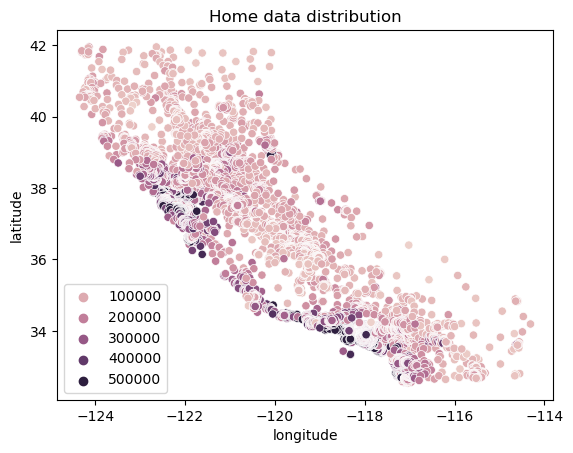

In [3]:
#now we must try to plot scatter plot and see the distribution
sns.scatterplot(data=home_data,x="longitude",y="latitude",hue="median_house_value")
plt.title("Home data distribution")
plt.legend(loc=3)
plt.show()

In [4]:
#training and testing data libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
X = home_data[["longitude","latitude"]]
Y= home_data[["median_house_value"]]
#this time we are taking test size of 30 % and 70% of train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state =0)

In [6]:
#now we are going to normalize the data 
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [7]:
X_test_norm

array([[-0.96337746,  0.26814898],
       [-0.96106146,  0.2763347 ],
       [-0.9531905 ,  0.30237043],
       ...,
       [-0.95437354,  0.29861539],
       [-0.96100634,  0.27652634],
       [-0.96154847,  0.27463527]])

In [8]:
#now importing the library for kmeans...that will clustered the data and plot the data which is nearest to the center of 
#particular cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,random_state = 0,init = "k-means++")
kmeans.fit(X_train_norm)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

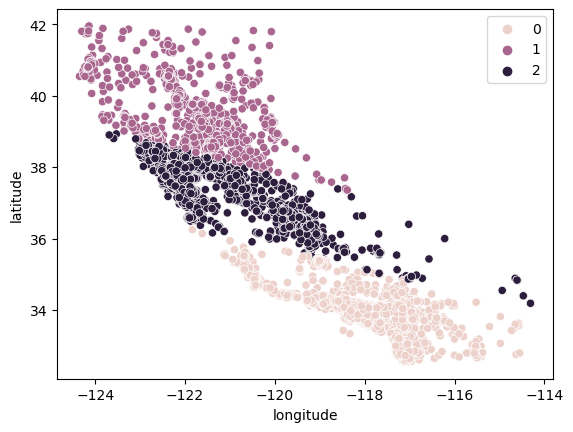

In [9]:
#that is like the distribution of data in clusters all clusters have their own center point and points nearest to the center 
#point comes in one cluster
sns.scatterplot(data =X_train,x="longitude",y="latitude",hue= kmeans.labels_)

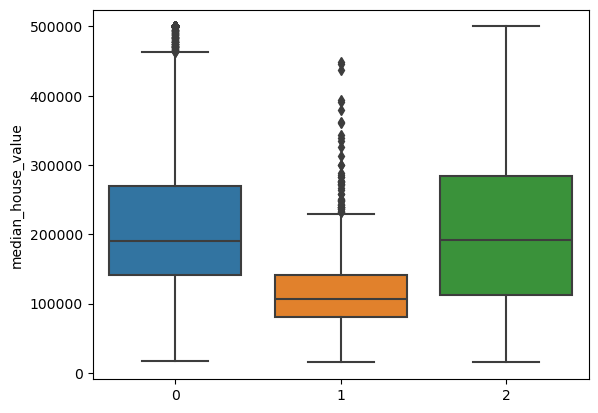

In [10]:
#box_plot
sns.boxplot(x= kmeans.labels_,y= Y_train["median_house_value"])
plt.show()

In [11]:
#now testing score of our data
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm,kmeans.labels_,metric='euclidean')

0.7499371920888368

As we can see the testing or accuracy score is not too high thats why we are seeing some deviations in the scatter plot also 
lets take all the fields in our dataset

In [12]:
home_data_2 = pd.read_csv("D://Business analytics//Excel class//Python//Machine learning//housing.csv")
home_data_2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

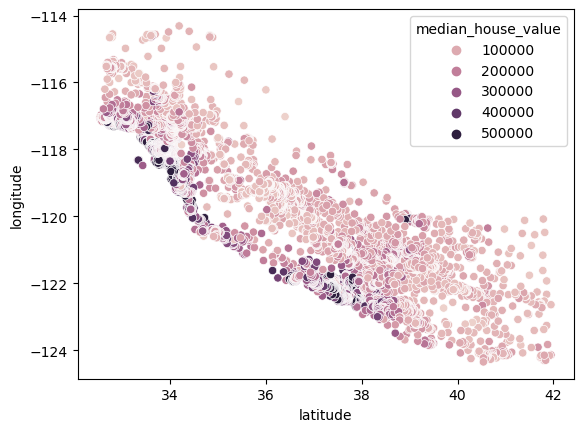

In [13]:
sns.scatterplot(data= home_data_2,x= "latitude", y="longitude",hue="median_house_value")
plt.show()

In [14]:
home_data_2.columns
type(home_data_2)

pandas.core.frame.DataFrame

In [15]:
home_data_2.replace({"ocean_proximity":{"<1H OCEAN":0,"INLAND":1,"ISLAND":2,"NEAR BAY":3,"NEAR OCEAN":4}},inplace=True)
type(home_data_2)

pandas.core.frame.DataFrame

In [16]:
home_data_2 = home_data_2.dropna(axis=0)
home_data_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [18]:
X = home_data_2[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']]
Y = home_data_2["median_house_value"]

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [20]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [21]:
kmeans2 = KMeans(n_clusters=3,random_state=0,init= "k-means++")
kmeans2.fit(X_train_norm)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

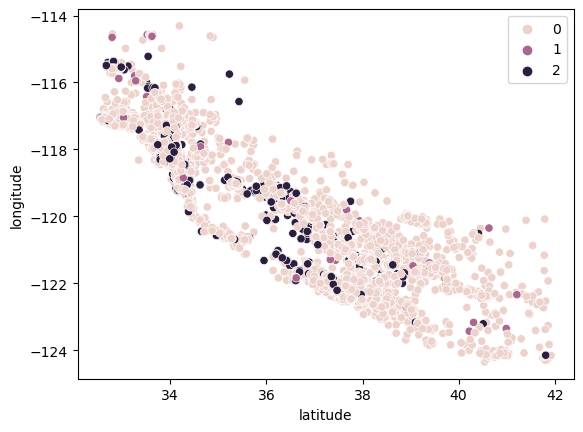

In [22]:
sns.scatterplot(data=X_train,x="latitude", y="longitude",hue= kmeans2.labels_)
plt.show()

In [24]:
#checking the testing score

silhouette_score(X_train_norm, kmeans2.labels_, metric='euclidean')

0.5323898782506059